### Import the libraries 

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

### Read the file into Python as a dataframe 

In [2]:
df = pd.read_csv("files_for_lab/csv_files/marketing_customer_analysis.csv")
df.head(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


### 1. Show the dataframe info

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

### 2. Describe DataFrame

In [4]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


### 3. Show a plot of the total number of responses

In [5]:
df.value_counts('Response')
no = 8813
yes = 1466
total_number_of_responses = 8813 + 1466
total_number_of_responses

10279

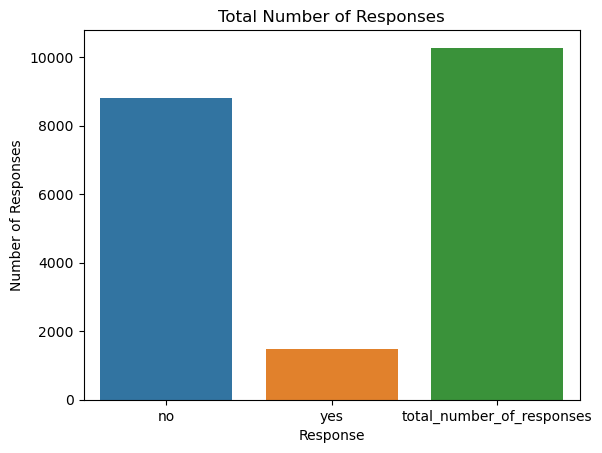

In [6]:
x = ["no", "yes", "total_number_of_responses"]
y = [8813, 1466, 10279]

ax = sns.barplot(x, y);

ax.set(xlabel = "Response", ylabel = "Number of Responses")

plt.title("Total Number of Responses");

plt.show()

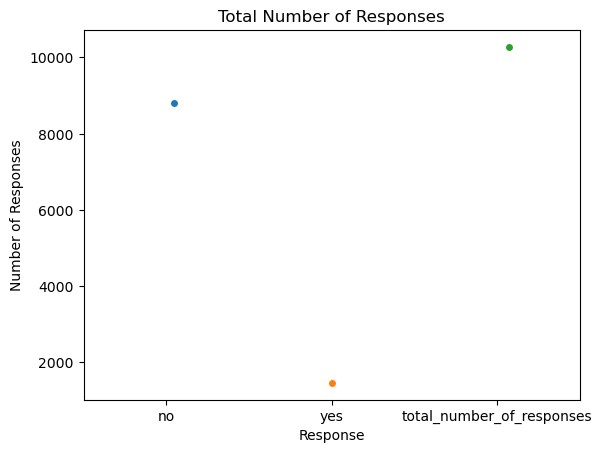

In [7]:
x = ["no", "yes", "total_number_of_responses"]
y = [8813, 1466, 10279]

ax = sns.stripplot(x, y);

ax.set(xlabel = "Response", ylabel = "Number of Responses")

plt.title("Total Number of Responses");

plt.show()

### 4. Show a plot of the response rate by the sales channel

In [8]:
sales_channel = df[["Response", "Sales Channel"]]
sales_channel

,Response,Sales Channel
0,No,Agent
1,No,Agent
2,No,Agent
3,No,Call Center
4,No,Agent
...,...,...
9129,No,Web
9130,Yes,Branch
9131,No,Branch
9132,No,Branch


In [9]:
sales_channel.value_counts("Response")

Response
No     7826
Yes    1308
dtype: int64

In [10]:
total_responses = 8813 + 1466
total_responses

10279

In [11]:
sales_channel.value_counts(dropna = True)

Response  Sales Channel
No        Agent            2811
          Branch           2273
          Call Center      1573
          Web              1169
Yes       Agent             666
          Branch            294
          Call Center       192
          Web               156
dtype: int64

In [12]:
total_no = 3148 + 2539 + 1792 + 1334
total_yes = 742 + 326 + 221 + 177
total_no, total_yes

(8813, 1466)

In [13]:
agent_response = 3148 + 742
branch_response = 2539 + 326
call_center_response = 1792 + 221
web_response = 1332 + 177
agent_response, branch_response, call_center_response, web_response

(3890, 2865, 2013, 1509)

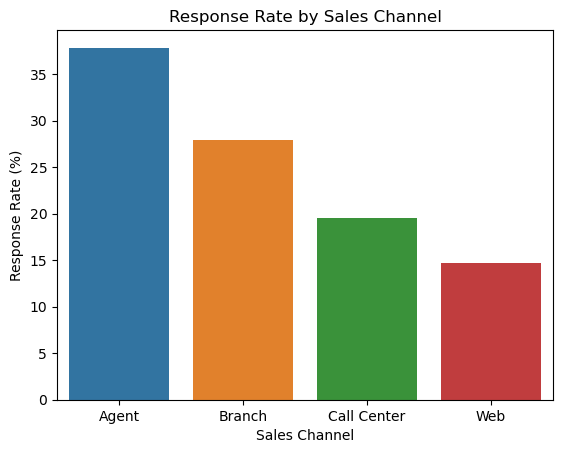

In [14]:
x = ["Agent", "Branch", "Call Center", "Web"]
y = [3890/10279*100, 2865/10279*100, 2013/10279*100, 1509/10279*100]

ax = sns.barplot(x, y);

ax.set(xlabel = "Sales Channel", ylabel = "Response Rate (%)")

plt.title("Response Rate by Sales Channel");

plt.show()

#my understanding of this question was that we are looking at which channel has the highest number of responses (not focusing on 'yes' and 'no'). So the response rate is yes + no as a percentage of the total number of responses

### 5. Show a plot of the response rate by the total claim amount 

In [15]:
total_claim_amount = df[["Response", "Total Claim Amount"]]
total_claim_amount

,Response,Total Claim Amount
0,No,384.811147
1,No,1131.464935
2,No,566.472247
3,No,529.881344
4,No,138.130879
...,...,...
9129,No,198.234764
9130,Yes,379.200000
9131,No,790.784983
9132,No,691.200000


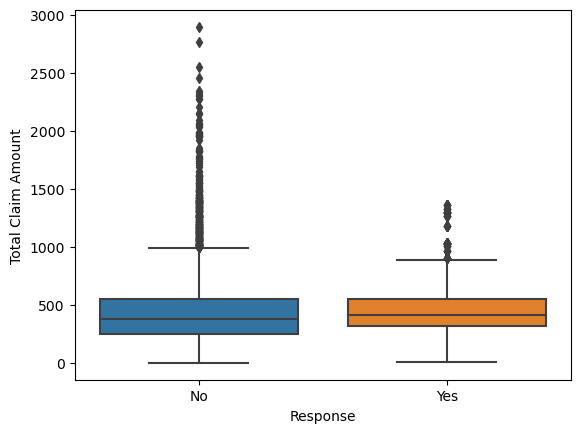

In [16]:
sns.boxplot(x = "Response", y = "Total Claim Amount", data = df)
plt.show()

### 6. Show a plot of the response rate by income

In [17]:
income = df[["Response", "Income"]]
income

,Response,Income
0,No,56274
1,No,0
2,No,48767
3,No,0
4,No,43836
...,...,...
9129,No,71941
9130,Yes,21604
9131,No,0
9132,No,21941


<function matplotlib.pyplot.show(close=None, block=None)>

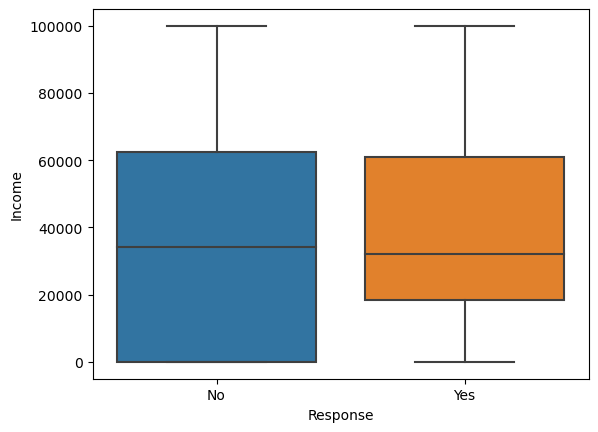

In [18]:
sns.boxplot(x = "Response", y = "Income", data = df)
plt.show